<a href="https://colab.research.google.com/github/OtabekMamajonov/qiziqish/blob/main/Multi_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/train')]

In [4]:
df = pd.read_csv(path/'train.csv')
df

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True
...,...,...,...
5006,009954.jpg,horse person,True
5007,009955.jpg,boat,True
5008,009958.jpg,person bicycle,True
5009,009959.jpg,car,False


In [6]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

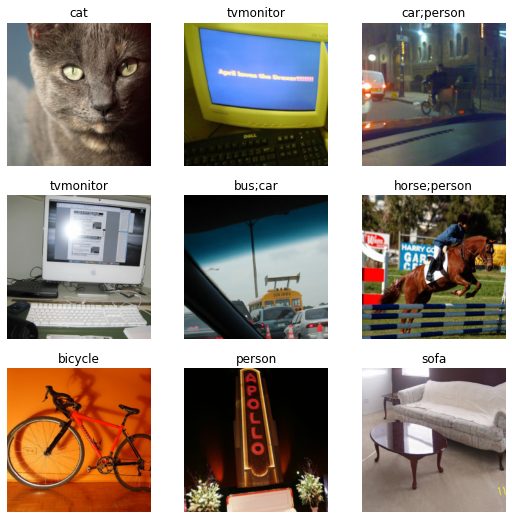

In [7]:
dls.show_batch()

In [8]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0014454397605732083)

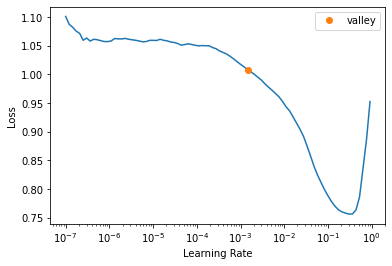

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.429438,0.131657,0.958307,0.711375,0.745209,01:04


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.197715,9.349037,0.852908,0.138911,0.213460,00:53
1,0.177713,0.134360,0.952649,0.522233,0.568744,00:52


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


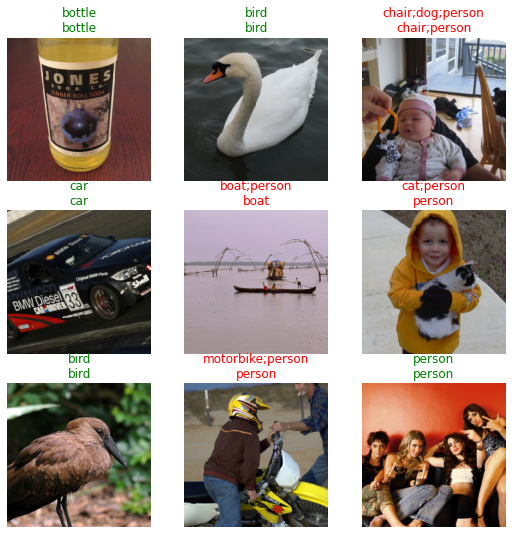

In [11]:
learn.show_results()

In [12]:
learn.predict(path/'train/000005.jpg')

((#2) ['chair','diningtable'],
 TensorBase([False, False, False, False, False, False, False, False,  True,
             False,  True, False, False, False, False, False, False, False,
             False, False]),
 TensorBase([1.0400e-03, 2.3524e-02, 8.7951e-04, 2.0401e-03, 7.0891e-02,
             3.2603e-03, 1.3147e-02, 1.5668e-02, 8.7077e-01, 1.2055e-03,
             6.0605e-01, 8.2177e-03, 6.7143e-03, 5.0311e-03, 3.7902e-01,
             1.2308e-01, 7.8361e-04, 2.4434e-01, 6.5165e-03, 1.3990e-01]))

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [13]:
learn.export('model.pkl')